In [1]:
'from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the required Libraries

In [2]:
import sys
import os
import numpy as np
import keras
import numpy as np
from keras.models import Sequential,Model
from keras.layers import *
import seaborn as sns
from sklearn.model_selection import cross_val_score 

We have three dataset each for train test and validation.

In each of these there are multiple files. One of such file is dialogues_(train/test) format. This file contains dialogues, i.e the sentences. 

The file of form dialogues_emotion_(train/test) contains the emotion corresponding to each sentence.

In [3]:
train_dialogue_f=open('/content/drive/My Drive/daily_dialogue/train/train/dialogues_train.txt','r',encoding="utf8")
train_emotion_f=open('/content/drive/My Drive/daily_dialogue/train/train/dialogues_emotion_train.txt','r')
test_dialogue_f=open('/content/drive/My Drive/daily_dialogue/test/test/dialogues_test.txt',encoding="utf8")
test_emotion_f=open('/content/drive/My Drive/daily_dialogue/test/test/dialogues_emotion_test.txt')
validation_dialogue_f=open('/content/drive/My Drive/daily_dialogue/validation/validation/dialogues_validation.txt',encoding="utf8")
validation_emotion_f=open('/content/drive/My Drive/daily_dialogue/validation/validation/dialogues_emotion_validation.txt')

**Description of Dataset :-**

Each line of training dialogue file contains a dialogue. A dialogue is a full conversation, like when we talk on phone the whole call is a dialogue. Each utterance(it can be thought of one sentence) is separated by "\_\_eou\_\_" statement. 

Each line of the dialogue emotion file contains emotion in form of numbers, corresponding to each sentence. 

for eg if we have a dialogue like sentence1 \_\_eou\_\_sentence2 \_\_eou\_\_ sentence3 \_\_eou\_\_ sentence4 \_\_eou\_\_ sentence5 \_\_eou\_\_ sentence6 \_\_eou\_\_  , then in emotion file we will have first line like 0 0 3 4 0 0 where sentence1 will represent 0th emotion, sentence 3 will have 3rd emotion like this. 



Mapping of emotion is as follows:

{ 0: no emotion, 1: anger, 2: disgust, 3: fear, 4: happiness, 5: sadness, 6: surprise}

**Extraction of data** 
We are storing each sentences in train_dailogue_arr. We are first reading each line as "each_dialogue" from our file train_dialogue_f. Then "each dialogue" have sentences in form of sentence1 \_\_eou\_\_sentence2 \_\_eou\_\_ sentence3 \_\_eou\_\_ . Now we are separating each sentence by splitting each_dialogue and store each sentence in train_dialogue_arr. 

Similarly in train_emotion_arr we are storing emotion. Corresponding to each dialogue as above, we have emotion stored like 0 0 3 4 2 , in this form, we are splitting each line on the basis of space and store the emotion number in our train_emotion_arr, which is emotion corresponding to the sentences in train_dialogue_arr. 

In [4]:
train_dialogue_arr=[]
for each_dialogue in train_dialogue_f:
    #here each each_dialogue means each line of our dialogue dataset
    for each_utterance in each_dialogue.split('__eou__'):
        #each_utterance means each sentence of our dialogue separated by __eou__
        train_dialogue_arr.append(each_utterance)
        #remember we are storing each sentence directly in this array
    train_dialogue_arr.pop() #for removing \n, as after last __eou__ there will be no sentence but \n will then get read.
print(train_dialogue_arr[:20])

['Say , Jim , how about going for a few beers after dinner ? ', ' You know that is tempting but is really not good for our fitness . ', ' What do you mean ? It will help us to relax . ', " Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ? ", " I guess you are right.But what shall we do ? I don't feel like sitting at home . ", ' I suggest a walk over to the gym where we can play singsong and meet some of our friends . ', " That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them . ", ' Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too . ', " Good.Let ' s go now . ", ' All right . ', 'Can you do push-ups ? ', " Of course I can . It's a piece of cake ! Believe it or not , I can do 30 push-ups a minute . ", " Really ? I think that's impossible ! ", ' You mean 30 push-ups ? ', ' Yeah ! ', " It's easy . If you do e

In [5]:
train_emotion_arr=[] 
for line in train_emotion_f:
    #here line means each line of the emotion dataset like 0 0 1 2 3 0 , this will be one line
    for each_emotion in line.split():
        #each_emotion means emotion separated by space, like above each sentence is separated by __eou__, 
        #corresponding to that, each emotion is separated by space
        train_emotion_arr.append(each_emotion)
print(train_emotion_arr[:5])

['0', '0', '0', '0', '0']


In [6]:
test_dialogue_arr=[]
for each_dialogue in test_dialogue_f:
    for each_utterance in each_dialogue.split('__eou__'):
        test_dialogue_arr.append(each_utterance) 
    test_dialogue_arr.pop() #for removing \n
print(test_dialogue_arr[:5])


['Hey man , you wanna buy some weed ? ', ' Some what ? ', ' Weed ! You know ? Pot , Ganja , Mary Jane some chronic ! ', ' Oh , umm , no thanks . ', ' I also have blow if you prefer to do a few lines . ']


In [7]:
test_emotion_arr=[] 
for line in test_emotion_f:
    for each_emotion in line.split():
        test_emotion_arr.append(each_emotion) 
print(test_emotion_arr[:5])

['0', '6', '0', '0', '0']


In [8]:
validation_dialogue_arr=[]
for each_dialogue in validation_dialogue_f:
    for each_utterance in each_dialogue.split('__eou__'):
        validation_dialogue_arr.append(each_utterance) 
    validation_dialogue_arr.pop() #for removing \n
print(validation_dialogue_arr[:5])

['Good morning , sir . Is there a bank near here ? ', ' There is one . 5 blocks away from here ? ', " Well , that's too far.Can you change some money for me ? ", ' Surely , of course . What kind of currency have you got ? ', ' RIB . ']


In [9]:
validation_emotion_arr=[] 
for line in validation_emotion_f:
    for each_emotion in line.split():
        validation_emotion_arr.append(each_emotion) 
print(validation_emotion_arr[:5])

['0', '0', '0', '0', '0']


You can see above that, 5 sentences are printed, and corresponding to that, 5 numbers are printed in the array below, these numbers represent the emotion of that sentence. each of the these numbers have a emotion attached with them as follows
{ 0: no emotion, 1: anger, 2: disgust, 3: fear, 4: happiness, 5: sadness, 6: surprise}

Below the size of train, test and validataion is printed. Here Train_emotion_arr is our label array. You can see that both training and label arrays have same size as it shoould be.

In [10]:
print("Length of train_dialogue_arr is : ",len(train_dialogue_arr))
print("Length of train_emotion_err is : ",len(train_emotion_arr))

Length of train_dialogue_arr is :  87170
Length of train_emotion_err is :  87170


In [11]:
print("Length of test_dialogue_arr is : ",len(test_dialogue_arr))
print("Length of test_emotion_err is : ",len(test_emotion_arr))

Length of test_dialogue_arr is :  7740
Length of test_emotion_err is :  7740


In [12]:
print("Length of validation_dialogue_arr is : ",len(validation_dialogue_arr))
print("Length of validatoin_emotion_err is : ",len(validation_emotion_arr))

Length of validation_dialogue_arr is :  8069
Length of validatoin_emotion_err is :  8069


Below we are first tokenising the sentence and then padding them. Tokenising means to break the sentence into array of words. This is done beacause word is smallest meaningfull entity of any language. So to understand emotion we have to look into what words are in this. So we perform operation on words. 

Second thing that we are doing is to padd the tokenised arrays. We know all the sentences will not have equal no of words but while operating we will need fixed size of vector. So we have to make them of equal size as here every sentence is made into array of 20 words where \<pad\> is used for filling the extra space. It will act like null word haveing no meaning. 

For example:-

we have a sentence "Hi, I am you friend" 

After tokenisation it will become ["Hi",",","I","am","your","friend"] 

After padding it will be like ["Hi",",","I","am","your","friend","\<pad\>","\<pad\>","\<pad\>","\<pad\>","\<pad\>","\<pad\>","\<pad\>","\<pad\>","\<pad\>","\<pad\>"] 

In [13]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
def padd(arr):
    for i in range(20-len(arr)):
        arr.append('<pad>')
    return arr[:20]

In [15]:
train_tokenised_arr=[word_tokenize(sent) for sent in train_dialogue_arr]
train_padded_arr=[padd(token_arr) for token_arr in train_tokenised_arr]
print(train_padded_arr[0])

['Say', ',', 'Jim', ',', 'how', 'about', 'going', 'for', 'a', 'few', 'beers', 'after', 'dinner', '?', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


In [16]:
test_tokenised_arr=[word_tokenize(sent) for sent in test_dialogue_arr]
test_padded_arr=[padd(token_arr) for token_arr in test_tokenised_arr]
print(test_padded_arr[0])

['Hey', 'man', ',', 'you', 'wan', 'na', 'buy', 'some', 'weed', '?', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


In [17]:
validation_tokenised_arr=[word_tokenize(sent) for sent in validation_dialogue_arr]
validation_padded_arr=[padd(token_arr) for token_arr in validation_tokenised_arr]
print(validation_padded_arr[0])

['Good', 'morning', ',', 'sir', '.', 'Is', 'there', 'a', 'bank', 'near', 'here', '?', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


We are making a map word_to_emb corresponding to each word in the glove vector file on which we are working. key of word_to_emb is an english word whereas its value will be an array of size 50 containg float values. 

Note we have manually, put word_to_emb for \<pad\> as an array of size 50 with all values equals 0, means it is a null valued word.

In [18]:
vocab_f=open('/content/drive/My Drive/glove.6B.50d.txt',encoding='utf8')
word_to_emb={}
for line in vocab_f:
  word_to_emb[line.split()[0]]=[float(i) for i in line.split()[1:]] 
word_to_emb['<pad>']=[0]*50
print(len(word_to_emb['happy']))

50


Below we are embedding each sentence, wrt to its word. For each word we are taking its embedding from glove vector that we have downloaded. So if we have an array of say size 20 words. So, embedded array will be of size 20 X 50 size 2d vector, where each word will now get replace by it embedding vector of size 50, because we can perform mathematical operation only on numbers. 

So our array of form ['hi','how','are','you'] , will become [[0.3,0.9...],[0.3,-0.2...],[...],[...]] where each of the inner array will be of size 50.

In [19]:
def embed(padded_arr,word_to_emb):
    embedded_arr=[]
    for each_dialogue in padded_arr:
        embedded_arr.append([])
        for word in each_dialogue:
            if word.lower() in word_to_emb:
                embedded_arr[-1].append(word_to_emb[word.lower()])
            else:
                embedded_arr[-1].append([0]*50)
    return embedded_arr

In [20]:
X_train=np.array(embed(train_padded_arr,word_to_emb))
print("The shape of X_train is : ",X_train.shape)

The shape of X_train is :  (87170, 20, 50)


In [21]:
X_test=np.array(embed(test_padded_arr,word_to_emb))
print("The shape of X_test is : ",X_test.shape)

The shape of X_test is :  (7740, 20, 50)


In [22]:
X_validation=np.array(embed(validation_padded_arr,word_to_emb))
print("The shape of X_validation is : ",X_validation.shape)

The shape of X_validation is :  (8069, 20, 50)


Below we are encoding our label in one hot encoding form as follows: if our emotion number is 3 then we are putting 1 on number 3 and rest will be 0. 
The emotion number represents: { 0: no emotion, 1: anger, 2: disgust, 3: fear, 4: happiness, 5: sadness, 6: surprise}

In [23]:
def one_hot_encoding_label(label):
    if label==0:
        return [1,0,0,0,0,0,0]
    if label==1:
        return [0,1,0,0,0,0,0]
    if label==2:
        return [0,0,1,0,0,0,0]
    if label==3:
        return [0,0,0,1,0,0,0]
    if label==4:
        return [0,0,0,0,1,0,0]
    if label==5:
        return [0,0,0,0,0,1,0]
    else:
        return [0,0,0,0,0,0,1]
def one_hot_encoding(label_arr):
    return np.array([one_hot_encoding_label(int(each_label)) for each_label in label_arr])

Visualising how the 'One Hot Encoder' function is acting.

In [24]:
Y_train=one_hot_encoding(train_emotion_arr)
print(Y_train[0])

[1 0 0 0 0 0 0]


In [25]:
Y_test=one_hot_encoding(test_emotion_arr)
Y_validation=one_hot_encoding(validation_emotion_arr)

Don't forget to match first dimension of Y_arrays with X_arrays.

In [26]:
print(Y_train.shape,Y_test.shape,Y_validation.shape)

(87170, 7) (7740, 7) (8069, 7)


Firstly applying only CNN Model

In [27]:
def CNNModel(X,Y,input_size1,input_size2,output_size):
  model1 = Sequential()
  model1.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=[input_size1, input_size2]))
  model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model1.add(Dropout(0.5))
  model1.add(MaxPooling1D(pool_size=2))
  model1.add(Flatten())
  model1.add(Dense(100, activation='relu'))
  model1.add(Dense(output_size, activation='softmax'))
  model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model1.fit(X,Y,epochs=20)
  return model1

In [28]:
cnnModel=CNNModel(X_train,Y_train,20,50,7)

Epoch 1/20
2725/2725 [==============================] - 8s 3ms/step - loss: 0.5142 - accuracy: 0.8398
Epoch 2/20
2725/2725 [==============================] - 8s 3ms/step - loss: 0.4535 - accuracy: 0.8511
Epoch 3/20
2725/2725 [==============================] - 8s 3ms/step - loss: 0.4374 - accuracy: 0.8551
Epoch 4/20
2725/2725 [==============================] - 8s 3ms/step - loss: 0.4248 - accuracy: 0.8569
Epoch 5/20
2725/2725 [==============================] - 8s 3ms/step - loss: 0.4124 - accuracy: 0.8602
Epoch 6/20
2725/2725 [==============================] - 9s 3ms/step - loss: 0.4009 - accuracy: 0.8617
Epoch 7/20
2725/2725 [==============================] - 8s 3ms/step - loss: 0.3882 - accuracy: 0.8637
Epoch 8/20
2725/2725 [==============================] - 9s 3ms/step - loss: 0.3794 - accuracy: 0.8661
Epoch 9/20
2725/2725 [==============================] - 9s 3ms/step - loss: 0.3692 - accuracy: 0.8687
Epoch 10/20
2725/2725 [==============================] - 8s 3ms/step - loss: 0.358

In [30]:
cnnModel.evaluate(X_test,Y_test)

242/242 [==============================] - 1s 2ms/step - loss: 0.5819 - accuracy: 0.8297


[0.5818910598754883, 0.8297157883644104]

Applying only BiLSTM Model

In [ ]:
def BiLSTMModel(X,Y,input_size1,input_size2,output_size):
  m=Sequential()
  m.add(Bidirectional(LSTM(100,input_shape=(input_size1,input_size2))))
  m.add(Dropout(0.5))
  m.add(Dense(output_size,activation='softmax'))
  m.compile('Adam','categorical_crossentropy',['accuracy'])
  m.fit(X,Y,epochs=20, batch_size=128)
  return m

In [ ]:
bilstmModel=BiLSTMModel(X_train,Y_train,20,50,7)

Epoch 1/20
682/682 [==============================] - 5s 7ms/step - loss: 0.5490 - accuracy: 0.8333
Epoch 2/20
682/682 [==============================] - 4s 6ms/step - loss: 0.4730 - accuracy: 0.8464
Epoch 3/20
682/682 [==============================] - 4s 6ms/step - loss: 0.4543 - accuracy: 0.8495
Epoch 4/20
682/682 [==============================] - 4s 6ms/step - loss: 0.4446 - accuracy: 0.8527
Epoch 5/20
682/682 [==============================] - 4s 6ms/step - loss: 0.4351 - accuracy: 0.8548
Epoch 6/20
682/682 [==============================] - 4s 6ms/step - loss: 0.4279 - accuracy: 0.8557
Epoch 7/20
682/682 [==============================] - 4s 6ms/step - loss: 0.4211 - accuracy: 0.8568
Epoch 8/20
682/682 [==============================] - 4s 6ms/step - loss: 0.4141 - accuracy: 0.8591
Epoch 9/20
682/682 [==============================] - 4s 6ms/step - loss: 0.4077 - accuracy: 0.8611
Epoch 10/20
682/682 [==============================] - 4s 6ms/step - loss: 0.4020 - accuracy: 0.8625

In [ ]:
bilstmModel.evaluate(X_test,Y_test)

242/242 [==============================] - 1s 3ms/step - loss: 0.4826 - accuracy: 0.8429


[0.48263320326805115, 0.8428940773010254]

Applying both BiLSTM and CNN model together i.e Our proposed SENN Model

In [31]:
def SENNModel(X,Y,input_size1,input_size2,output_size):
    first_input = Input(shape=[input_size1,input_size2])
    cnn=Conv1D(256,3, activation='relu')(first_input)
    gm=GlobalMaxPooling1D()(cnn)
    out1=Dense(32,activation='relu')(gm)
    second_input = Input(shape=[input_size1,input_size2])
    BiLSTM=Bidirectional(LSTM(512,input_shape=[input_size1,input_size2]))(second_input)
    out2=Dense(32,activation='relu')(BiLSTM)
    merged=Concatenate()([out1,out2])
    print(type(merged))
    out=Dense(output_size,activation='softmax')(merged)
    m=Model(inputs=[first_input,second_input], outputs=out)
    m.compile('Adam','categorical_crossentropy',['accuracy'])
    m.fit([X,X],Y,epochs=20,batch_size=128)
    return m

In [32]:
sennModel=SENNModel(X_train,Y_train,20,50,7)

<class 'tensorflow.python.framework.ops.Tensor'>
Epoch 1/20
682/682 [==============================] - 11s 17ms/step - loss: 0.4957 - accuracy: 0.8439
Epoch 2/20
682/682 [==============================] - 11s 16ms/step - loss: 0.4327 - accuracy: 0.8555
Epoch 3/20
682/682 [==============================] - 11s 17ms/step - loss: 0.4076 - accuracy: 0.8604
Epoch 4/20
682/682 [==============================] - 11s 17ms/step - loss: 0.3884 - accuracy: 0.8653
Epoch 5/20
682/682 [==============================] - 12s 17ms/step - loss: 0.3715 - accuracy: 0.8693
Epoch 6/20
682/682 [==============================] - 12s 17ms/step - loss: 0.3530 - accuracy: 0.8735
Epoch 7/20
682/682 [==============================] - 12s 17ms/step - loss: 0.3364 - accuracy: 0.8787
Epoch 8/20
682/682 [==============================] - 12s 17ms/step - loss: 0.3160 - accuracy: 0.8837
Epoch 9/20
682/682 [==============================] - 12s 17ms/step - loss: 0.2938 - accuracy: 0.8908
Epoch 10/20
682/682 [============

In [33]:
sennModel.evaluate([X_test,X_test],Y_test)

242/242 [==============================] - 1s 5ms/step - loss: 0.8483 - accuracy: 0.8317


[0.8483032584190369, 0.8316537737846375]

Predicting on X_Test

In [34]:
Y_Pred=sennModel.predict([X_test,X_test])

In [35]:
print(Y_Pred[0])

[9.9981052e-01 8.2541135e-07 4.4408046e-09 1.0500999e-06 1.8274572e-04
 3.3955474e-11 4.8980569e-06]


Rounding off the predictions in Y_pred

In [36]:
round_preds = np.around(Y_Pred)
print(round_preds[0])

[1. 0. 0. 0. 0. 0. 0.]


In [37]:
class_preds = np.argmax(round_preds, axis=-1)
print(class_preds[:10])

[0 0 0 0 0 0 0 0 0 0]


In [38]:
Y_test=np.argmax(Y_test, axis=-1)
print(len(Y_test))

7740


In [39]:
print(Y_test[:10])

[0 6 0 0 0 0 0 0 0 0]


In [40]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,class_preds)
print(cf)

[[5900   30    4    1  320   34   32]
 [  81   32    1    0    0    0    4]
 [  35    2    9    0    1    0    0]
 [  13    0    0    4    0    0    0]
 [ 569    1    0    0  442    1    6]
 [  84    0    0    0    0   18    0]
 [  65    3    0    0    9    0   39]]


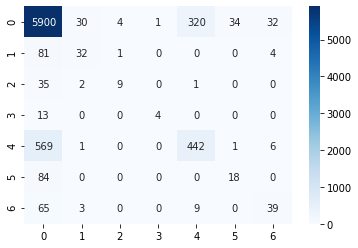

In [41]:
sns.heatmap(cf, annot=True,cmap='Blues',fmt="d")

Visualising Data in Percentage

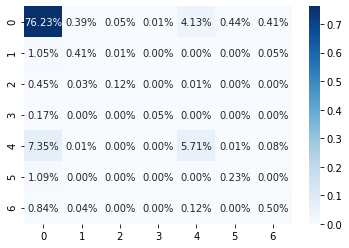

In [42]:
sns.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues')

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,class_preds)

0.8325581395348837

In [44]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,class_preds)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6321
           1       0.47      0.27      0.34       118
           2       0.64      0.19      0.30        47
           3       0.80      0.24      0.36        17
           4       0.57      0.43      0.49      1019
           5       0.34      0.18      0.23       102
           6       0.48      0.34      0.40       116

    accuracy                           0.83      7740
   macro avg       0.60      0.37      0.43      7740
weighted avg       0.81      0.83      0.82      7740

